In [1]:
# Load required modules ===============================================================
%matplotlib inline
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Load data/Read in CSV files ===============================================================
combined = pd.ExcelFile('Data.For.Histograms.xlsx')
drinking = combined.parse('Drinking.Behavior')
sexual = combined.parse('Sexual.Behavior')

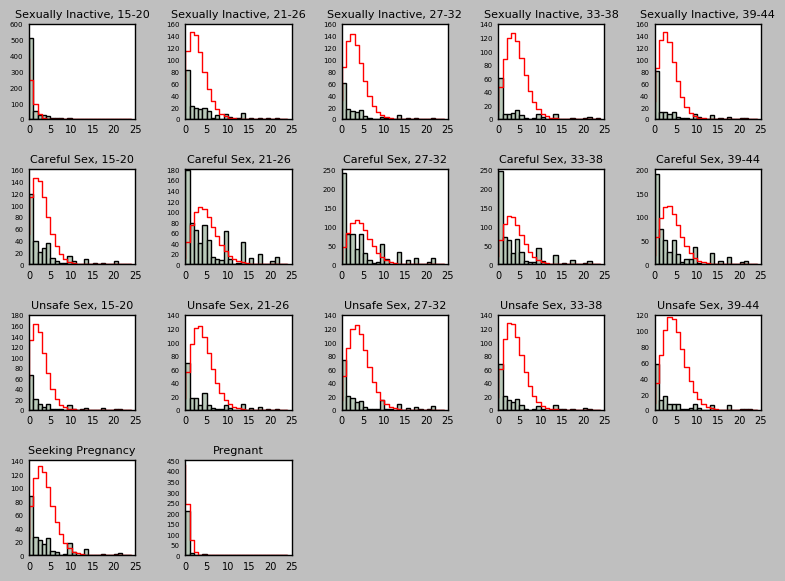

In [3]:
# Plot 'drinking' histograms ===============================================================
mpl.style.use('classic') # Use classic MPL layout
fig = plt.figure() # add plot figure
for i in range(0, len(drinking.columns), 5): # For-loop for creating subplots grouped by category
    for j in range(5):
        if (i + j < 17):
            ax = plt.subplot2grid((4,5), (i/4,j)) # Create subplot
            ax.tick_params(length=0) # Remove tick marks
            plt.hist(drinking.iloc[2:, i + j].dropna(), bins=range(0,25,1), color = '#b9c9b9')
            poisson = []
            alpha, beta = list(drinking.iloc[0:2, i + j].dropna()) # Get alpha and beta values from table
            for x in range(25): # Create poisson distrubtion
                poisson.append(
                    ((math.gamma(x + beta)) * (math.pow(alpha, x)))/((math.gamma(beta))*(math.pow((1+alpha),
                    (beta + x)))*(math.factorial(x)))
                )
            poisson = np.asarray(poisson) * len(drinking) # Get expected values for poisson distribution
            plt.plot(range(25),poisson, color = 'red', ls = 'steps') # Plot poisson distribution
            plt.xlim(0,25)
            plt.xticks(fontsize = 7)
            plt.yticks(fontsize = 5)
            plt.title(list(drinking)[i + j], size = 8)
plt.tight_layout() # Ensure tight layout so legend/labels are not cut off
plt.savefig('drinking.pdf')

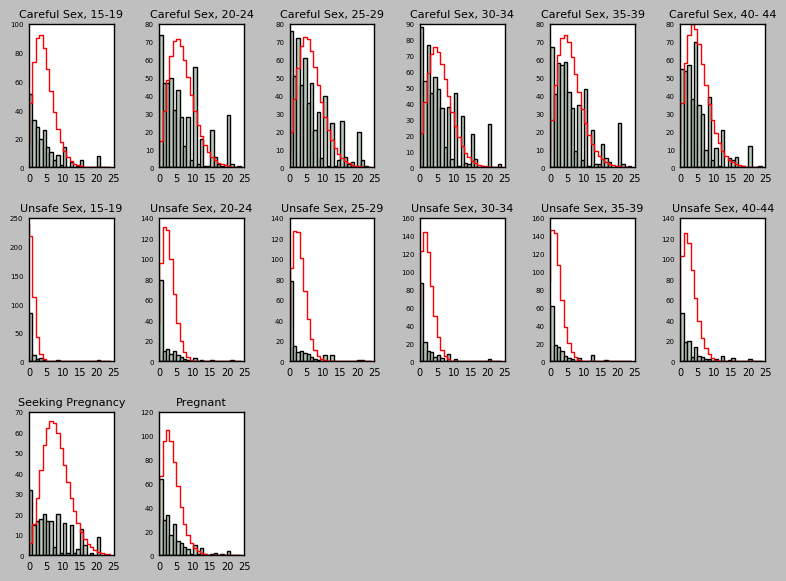

In [4]:
# Plot 'sexual' histograms; modified code from above ===============================================================
fig = plt.figure() # add plot figure
for i in range(0, len(sexual.columns), 6):
    for j in range(6):
        if (i + j < 14):
            ax = plt.subplot2grid((3,6), (i/6,j))
            ax.tick_params(length=0)
            plt.hist(sexual.iloc[2:, i + j].dropna(), bins=range(0,25,1), color = '#b9c9b9')
            poisson = []
            alpha, beta = list(sexual.iloc[0:2, i + j].dropna())
            for x in range(25):
                poisson.append(
                    ((math.gamma(x + beta)) * (math.pow(alpha, x)))/((math.gamma(beta))*(math.pow((1+alpha),
                    (beta + x)))*(math.factorial(x)))
                )
            poisson = np.asarray(poisson) * len(sexual)
            plt.plot(range(25),poisson, color = 'red', ls = 'steps')
            plt.xlim(0,25)
            plt.xticks(fontsize = 7)
            plt.yticks(fontsize = 5)
            plt.title(list(sexual)[i + j], size = 8)
plt.tight_layout()
plt.savefig('sexual.pdf')